In [1]:
import pandas
import numpy
import networkx
from matplotlib import pyplot as plt
import pickle

In [2]:
pickle_in = open("nets.p","rb")
nets = pickle.load(pickle_in)

## see what you got !!!

c:\users\esysss\appdata\local\programs\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


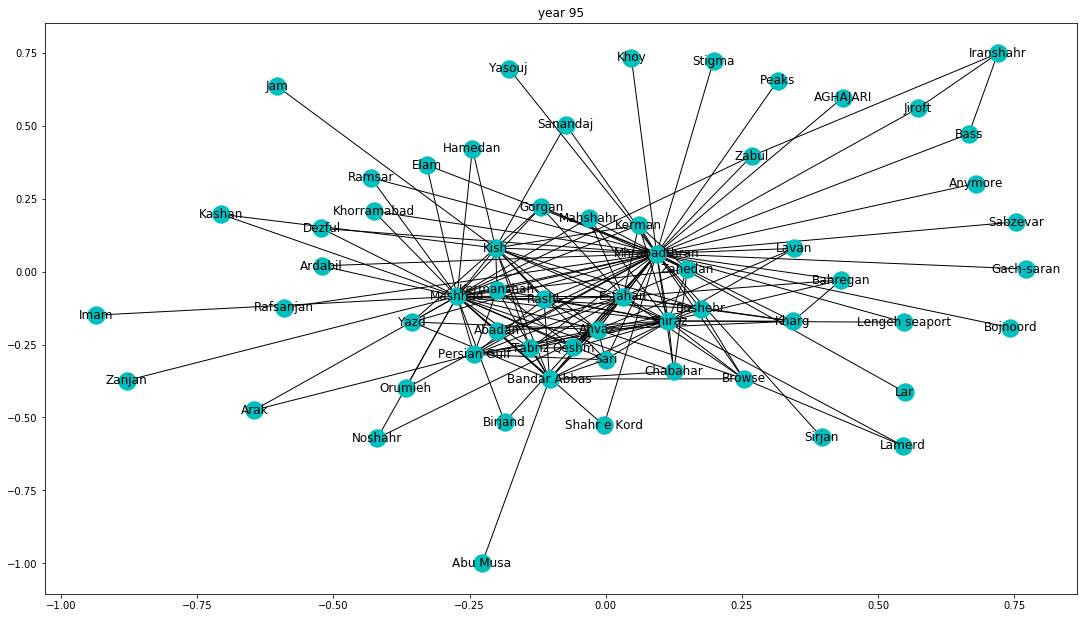

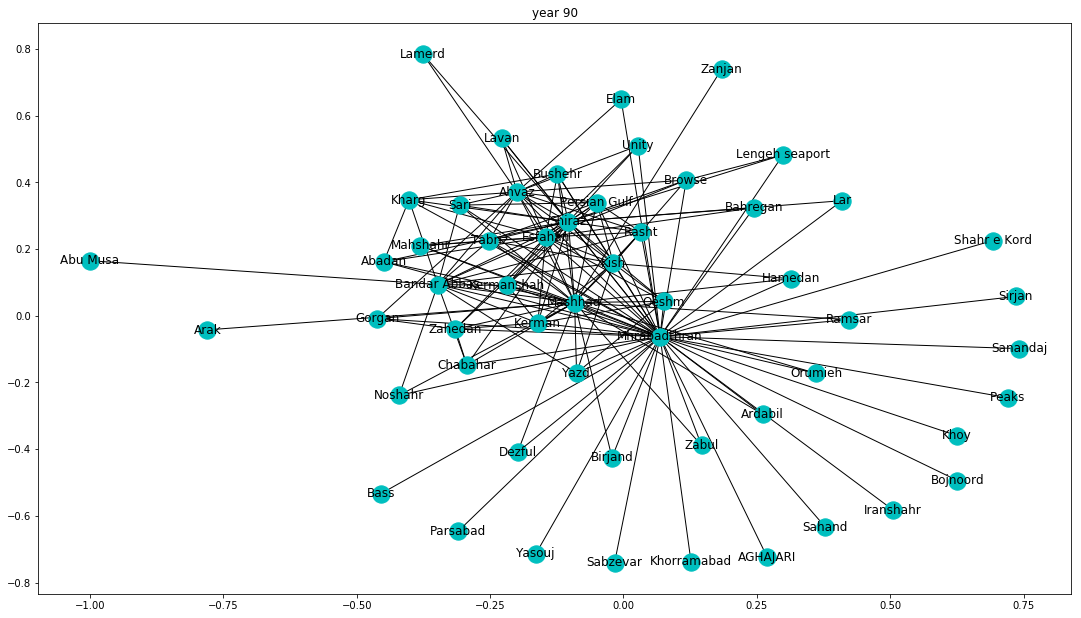

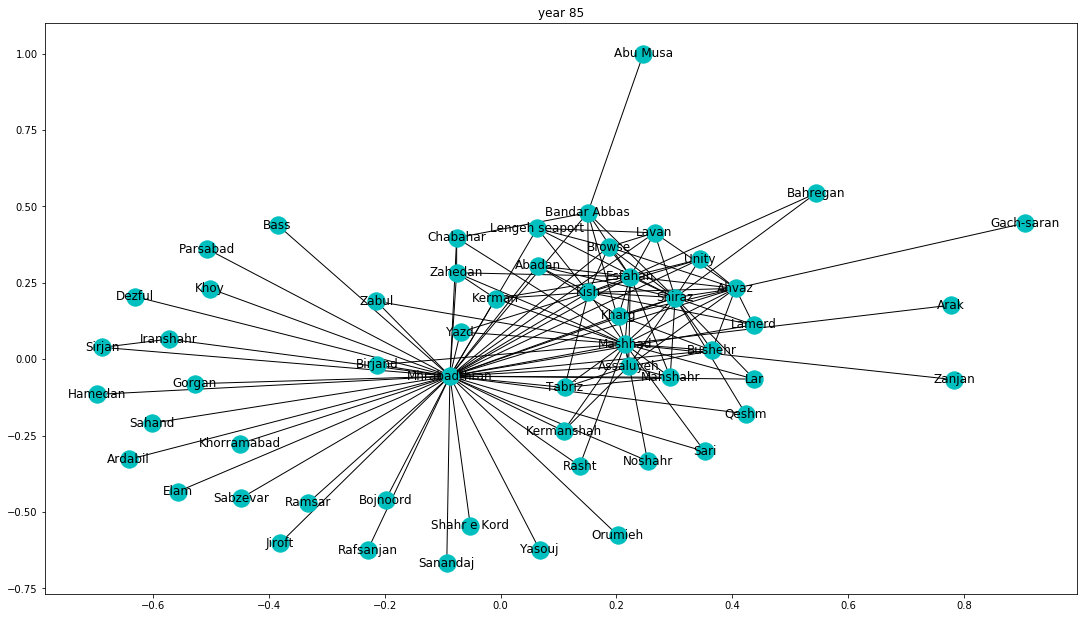

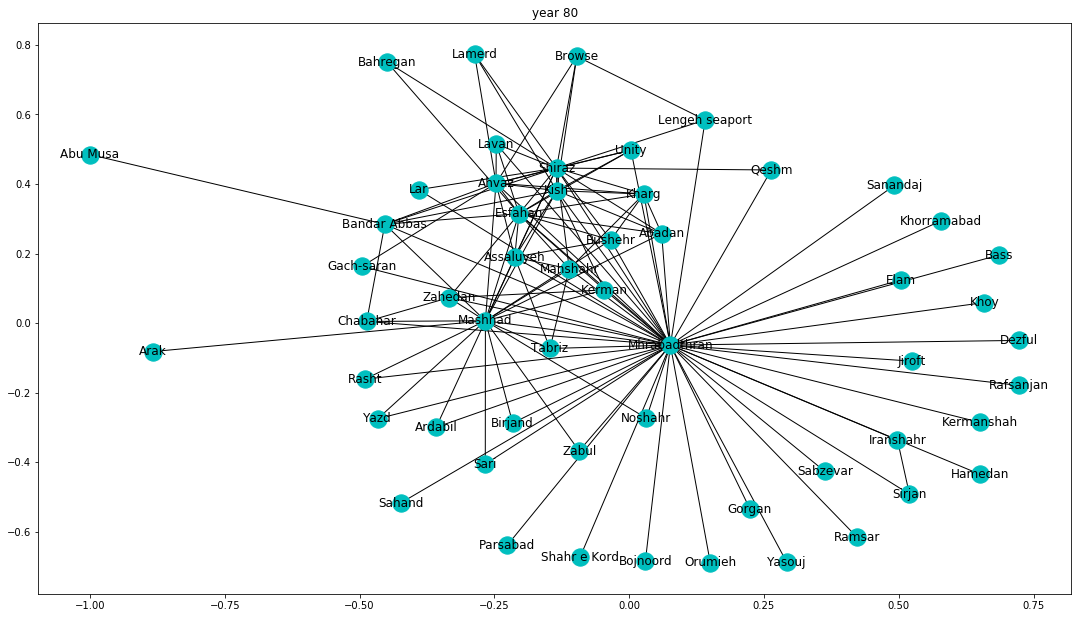

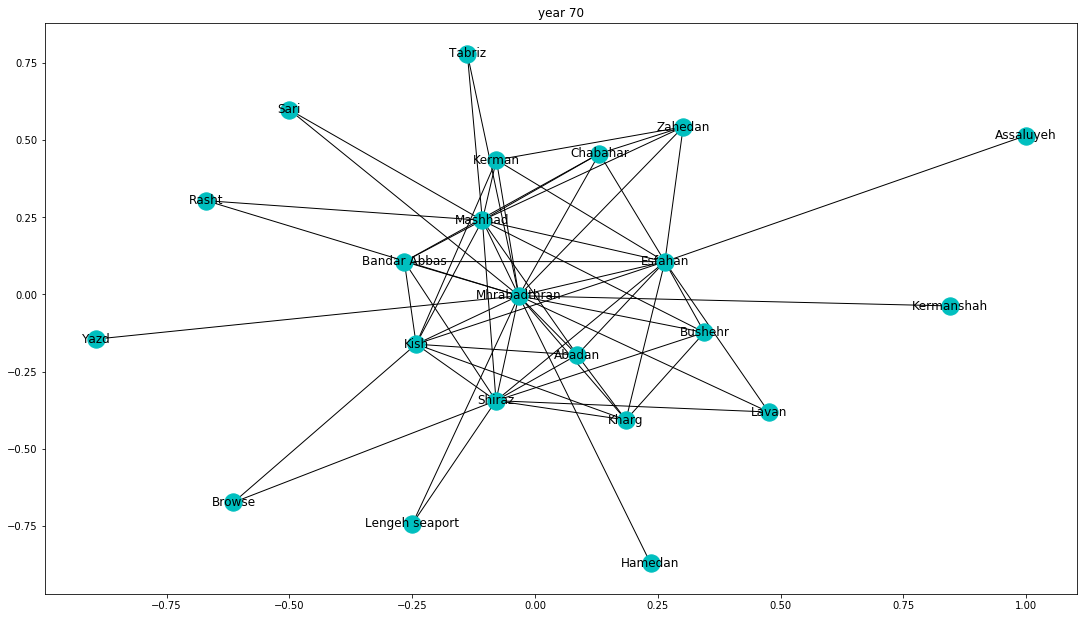

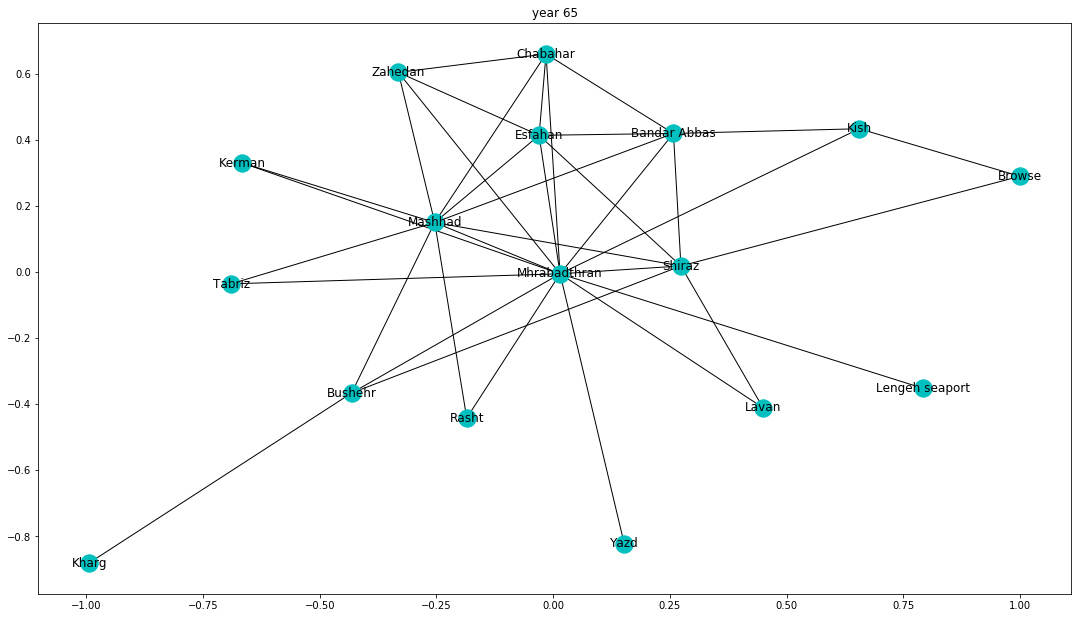

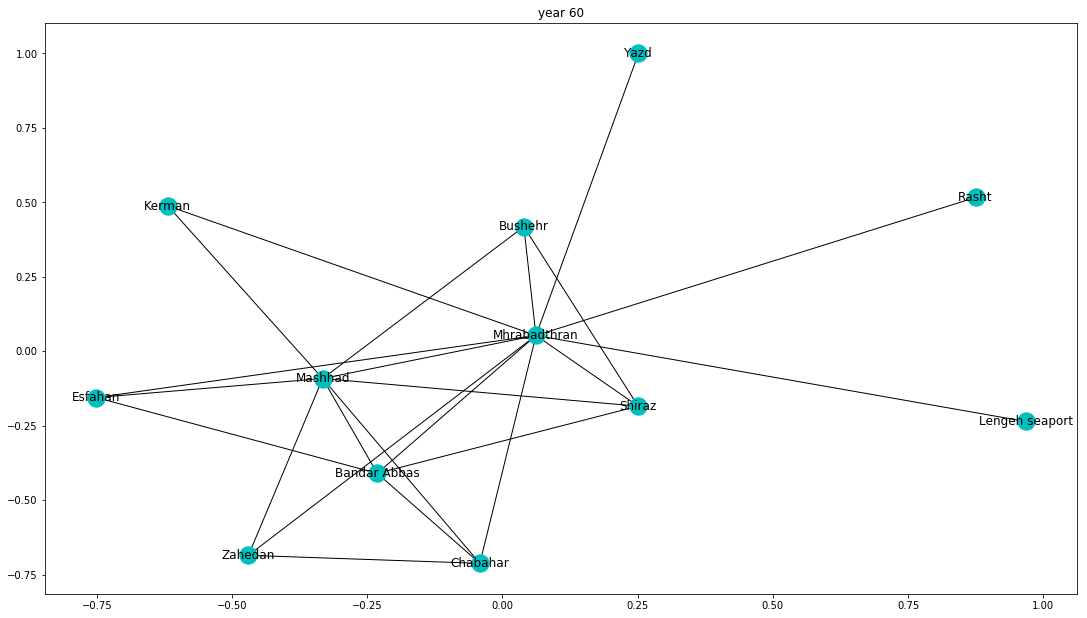

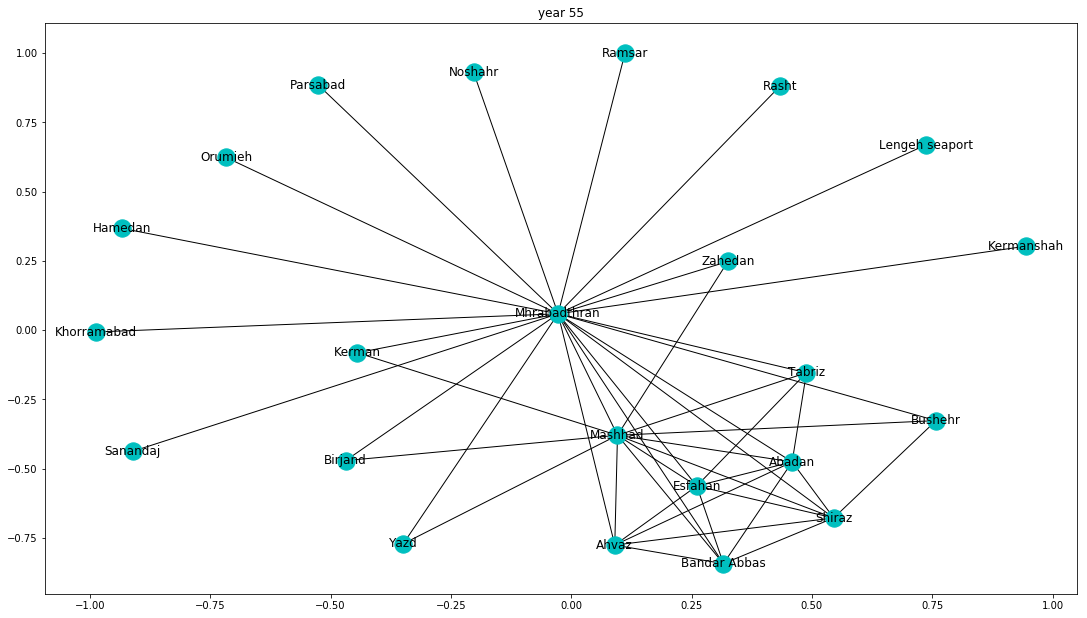

In [3]:
for net in nets:
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    networkx.draw_networkx(nets[net],node_color = "c")
    plt.title(f"year {net}")
#     plt.show()
    fig.savefig(f'year {net}.png', dpi=100)
    plt.show()

## test the k-core algorithm

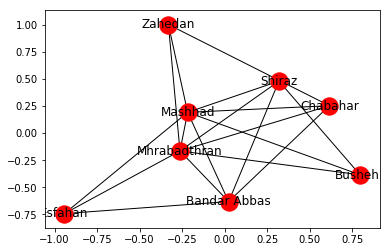

In [4]:
graph = networkx.algorithms.k_core(nets[60],k=3)
networkx.draw_networkx(graph)

In [5]:
def gomma_index(graph):
    v = len(graph)
    e = graph.number_of_edges()
    return (2*e)/(v*(v-1))

In [6]:
# year
# k
# Number of nodes in the k-core network
# Number of edges in the k-core network
k_core_graphs = {}
df = pandas.DataFrame(columns=["Year","K","Number of nodes in the k-core network",
                               "Number of edges in the k-core network","Connectivity (gamma index)"])
for counter,net in enumerate(nets):
    enough = True
    k = len(nets[net])
    while enough:
        if k - 1 == 0:
            print(f"somthing wrong in with the network in year {net}")
            exit()
        k -= 1
        temp_graph = networkx.algorithms.k_core(nets[net],k=k)
        if len(temp_graph) > 0:
            enough = False
            k_core_graphs[net] = temp_graph
            
    temp_df = pandas.DataFrame({"Year":[net], "K":[k] ,
                                "Number of nodes in the k-core network" :[len(temp_graph)] ,
                                "Number of edges in the k-core network" :[temp_graph.number_of_edges()],
                               "Connectivity (gamma index)" : [gomma_index(temp_graph)]})
    df = df.append(temp_df)
df

,Year,K,Number of nodes in the k-core network,Number of edges in the k-core network,Connectivity (gamma index)
0,95,7,13,62,0.794872
0,90,8,10,43,0.955556
0,85,5,17,70,0.514706
0,80,6,12,50,0.757576
0,70,5,12,43,0.651515
0,65,4,7,18,0.857143
0,60,3,8,18,0.642857
0,55,6,7,21,1.000000


In [78]:
df.to_csv("k-core results.csv",index = False)

In [19]:
for keys in k_core_graphs:
    temp_df = pandas.DataFrame(list(k_core_graphs[keys].edges()))
    temp_df.to_csv(f"{str(keys)}.csv",index = False)

In [16]:
pandas.DataFrame(list(k_core_graphs[keys].edges()))

,0,1
0,Mashhad,Mhrabadthran
1,Mashhad,Abadan
2,Mashhad,Bandar Abbas
3,Mashhad,Esfahan
4,Mashhad,Shiraz
5,Mashhad,Ahvaz
6,Bandar Abbas,Mhrabadthran
7,Bandar Abbas,Shiraz
8,Bandar Abbas,Esfahan
9,Bandar Abbas,Abadan


In [50]:
year = 95
for c in k_core_graphs[year].nodes:
    print(f"{c} : {len(k_core_graphs[year][c]) }")

Rasht : 8
Kish : 10
Kermanshah : 7
Mhrabadthran : 12
Sari : 7
Shiraz : 12
Qeshm : 7
Persian Gulf : 9
Mashhad : 12
Ahvaz : 11
Esfahan : 10
Tabriz : 9
Bandar Abbas : 10


In [46]:
print(f"{c} : {len(k_core_graphs[60][c]) }")

Mhrabadthran : 7


In [35]:
k_core_graphs[70].neighbors

<bound method Graph.neighbors of <networkx.classes.graph.Graph object at 0x000001EE32D67400>>

In [24]:
c

'Kerman'